In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install kaggle

In [3]:
import kaggle

# Download dataset
kaggle.api.dataset_download_files('apek1999/predict-mpv-of-polymer', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/apek1999/predict-mpv-of-polymer


In [4]:
df = pd.read_csv('algo.csv')

In [5]:
df.head(10)

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
5,04-06-18 5:45,25362.809,0.150,30.438940,78.293411,32548.566,0.140550,79.061462,3.2
6,04-06-18 7:45,25642.936,0.150,30.419355,78.568573,42557.902,0.166875,79.565430,3.4
7,04-06-18 9:45,27009.320,0.150,30.504484,78.852005,45878.480,0.160510,79.390396,3.6
8,04-06-18 11:45,27971.072,0.150,NaN,NaN,NaN,0.150164,NaN,3.7
9,04-06-18 13:45,27307.461,0.150,30.204451,78.931427,49528.848,0.159013,78.511749,3.8


In [6]:
df.shape

(2564, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2564 non-null   object 
 1   513FC31103.pv    2486 non-null   float64
 2   513HC31114-5.mv  2560 non-null   float64
 3   513PC31201.pv    2484 non-null   float64
 4   513LC31202.pv    2484 non-null   float64
 5   513FC31409.pv    2484 non-null   float64
 6   513FC31114-5.pv  2486 non-null   float64
 7   513TC31220.pv    2484 non-null   float64
 8   MFR              2564 non-null   float64
dtypes: float64(8), object(1)
memory usage: 180.4+ KB


In [8]:
df.describe()

,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
count,2486.000000,2560.000000,2484.000000,2484.000000,2484.00000,2486.000000,2484.000000,2564.000000
mean,25306.285729,0.178427,30.663706,77.651055,42525.14000,0.138530,80.144365,8.185218
std,1706.481672,0.077473,0.423345,0.919600,11331.86896,0.041869,0.823554,5.088696
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000
25%,24361.632000,0.136000,30.446129,76.992151,34795.53500,0.113764,79.677458,3.700000
50%,25365.754500,0.173500,30.622631,77.494477,41550.56250,0.132986,80.044308,4.300000
75%,26398.452250,0.200000,30.925738,78.210867,50010.29500,0.156990,80.496296,12.900000
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000


In [9]:
## The sensors names are not clear. Replacing them with actual labels 
df.columns

Index(['Unnamed: 0', '513FC31103.pv', '513HC31114-5.mv', '513PC31201.pv',
       '513LC31202.pv', '513FC31409.pv', '513FC31114-5.pv', '513TC31220.pv',
       'MFR'],
      dtype='object')

In [10]:
df = df.rename(columns = {
    'Unnamed: 0': 'TimeFrame',
    '513FC31103.pv':'C3 Feed Rate',
    '513HC31114-5.mv': 'H2C3 Ratio',
    '513PC31201.pv': 'Reactor Pressure',
    '513LC31202.pv':'Reactor Bed Level',
    '513FC31409.pv': 'C2 Flow Rate',
    '513FC31114-5.pv': 'Catalyst Feed Rate',
    '513TC31220.pv': 'Temperature',
    'MFR':'Melt Flow Rate (gm/10min)'
})

df.head(10)

,TimeFrame,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
5,04-06-18 5:45,25362.809,0.150,30.438940,78.293411,32548.566,0.140550,79.061462,3.2
6,04-06-18 7:45,25642.936,0.150,30.419355,78.568573,42557.902,0.166875,79.565430,3.4
7,04-06-18 9:45,27009.320,0.150,30.504484,78.852005,45878.480,0.160510,79.390396,3.6
8,04-06-18 11:45,27971.072,0.150,NaN,NaN,NaN,0.150164,NaN,3.7
9,04-06-18 13:45,27307.461,0.150,30.204451,78.931427,49528.848,0.159013,78.511749,3.8


In [11]:
df.describe()

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
count,2486.000000,2560.000000,2484.000000,2484.000000,2484.00000,2486.000000,2484.000000,2564.000000
mean,25306.285729,0.178427,30.663706,77.651055,42525.14000,0.138530,80.144365,8.185218
std,1706.481672,0.077473,0.423345,0.919600,11331.86896,0.041869,0.823554,5.088696
min,16106.025000,0.000000,26.946344,74.575958,9610.46480,0.022162,77.760117,1.500000
25%,24361.632000,0.136000,30.446129,76.992151,34795.53500,0.113764,79.677458,3.700000
50%,25365.754500,0.173500,30.622631,77.494477,41550.56250,0.132986,80.044308,4.300000
75%,26398.452250,0.200000,30.925738,78.210867,50010.29500,0.156990,80.496296,12.900000
max,30083.688000,0.980000,32.674332,83.841675,106073.61000,0.677979,91.566544,38.000000


In [12]:
## Except "TimeFrame" all are numerical columns

In [13]:
## Check for NaN values
df.isnull().sum()

TimeFrame                     0
C3 Feed Rate                 78
H2C3 Ratio                    4
Reactor Pressure             80
Reactor Bed Level            80
C2 Flow Rate                 80
Catalyst Feed Rate           78
Temperature                  80
Melt Flow Rate (gm/10min)     0
dtype: int64

In [14]:
## Also TimeFrame have no null vallues. Further, it can be used only in time-series analysis. For now, we are dropping the "TimeFrame" column
df = df.drop(['TimeFrame'],axis=1)
df.columns

Index(['C3 Feed Rate', 'H2C3 Ratio', 'Reactor Pressure', 'Reactor Bed Level',
       'C2 Flow Rate', 'Catalyst Feed Rate', 'Temperature',
       'Melt Flow Rate (gm/10min)'],
      dtype='object')

# EDA

In [15]:
## Check for rows where all columms are null
df[df.isnull().all(axis=1)]

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)


In [16]:
## Check for rows where a few columms are null
df[df.isnull().any(axis=1)]

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
8,27971.072,0.15,NaN,NaN,NaN,0.150164,NaN,3.7
718,NaN,0.00,NaN,NaN,NaN,NaN,NaN,15.4
719,NaN,0.00,NaN,NaN,NaN,NaN,NaN,16.4
720,NaN,0.00,NaN,NaN,NaN,NaN,NaN,16.4
721,NaN,0.00,NaN,NaN,NaN,NaN,NaN,18.4
...,...,...,...,...,...,...,...,...
2467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9
2560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


In [17]:
## Check for rows where more than 3 columms are null
null_counts = df.isnull().sum(axis=1)
df[null_counts>3]

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
8,27971.072,0.15,NaN,NaN,NaN,0.150164,NaN,3.7
718,NaN,0.00,NaN,NaN,NaN,NaN,NaN,15.4
719,NaN,0.00,NaN,NaN,NaN,NaN,NaN,16.4
720,NaN,0.00,NaN,NaN,NaN,NaN,NaN,16.4
721,NaN,0.00,NaN,NaN,NaN,NaN,NaN,18.4
...,...,...,...,...,...,...,...,...
2467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9
2560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


#### Since there are 80 rows of data that have almost every column(more than 3 out of 8) filled with null values, it is better to eliminate them.
Two Reasons:
- Filling them with mean or median values will result in almost the same value in every row. This will ultimately add to model complexity and bias.
- Eliminating 80 rows of data out of 2563 will not cause a considerable data loss.

In [18]:
df = df.dropna().reset_index(drop =True)

In [19]:
df.shape

(2484, 8)

In [20]:
df.head(10)

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
5,25362.809,0.150,30.438940,78.293411,32548.566,0.140550,79.061462,3.2
6,25642.936,0.150,30.419355,78.568573,42557.902,0.166875,79.565430,3.4
7,27009.320,0.150,30.504484,78.852005,45878.480,0.160510,79.390396,3.6
8,27307.461,0.150,30.204451,78.931427,49528.848,0.159013,78.511749,3.8
9,26623.619,0.150,30.201500,78.574249,43206.711,0.141628,78.461151,3.8


In [21]:
## Check for duplicates
df.duplicated().sum()

0

#### A new data column is taken as the natural log of MFR (ln(MFR)). The natural log of MFR is a better label (measured output) than MFR. This transform has a more linear relationship between the reactor conditions (inputs) and the predicted ln(MFR) output.

In [22]:
df['Melt Flow Rate (gm/10min)'] = np.log(df['Melt Flow Rate (gm/10min)'])

In [23]:
df

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,1.193922
...,...,...,...,...,...,...,...,...
2479,21437.066,0.180,31.306507,76.762871,13607.478,0.081950,79.421646,2.468100
2480,25108.557,0.180,29.496073,76.608147,43186.836,0.131283,81.863571,2.415914
2481,20050.275,0.250,31.061733,76.629868,31100.949,0.094293,80.764282,2.433613
2482,21003.520,0.185,27.864731,77.518692,52186.004,0.137511,83.706100,2.602690


## Histogram

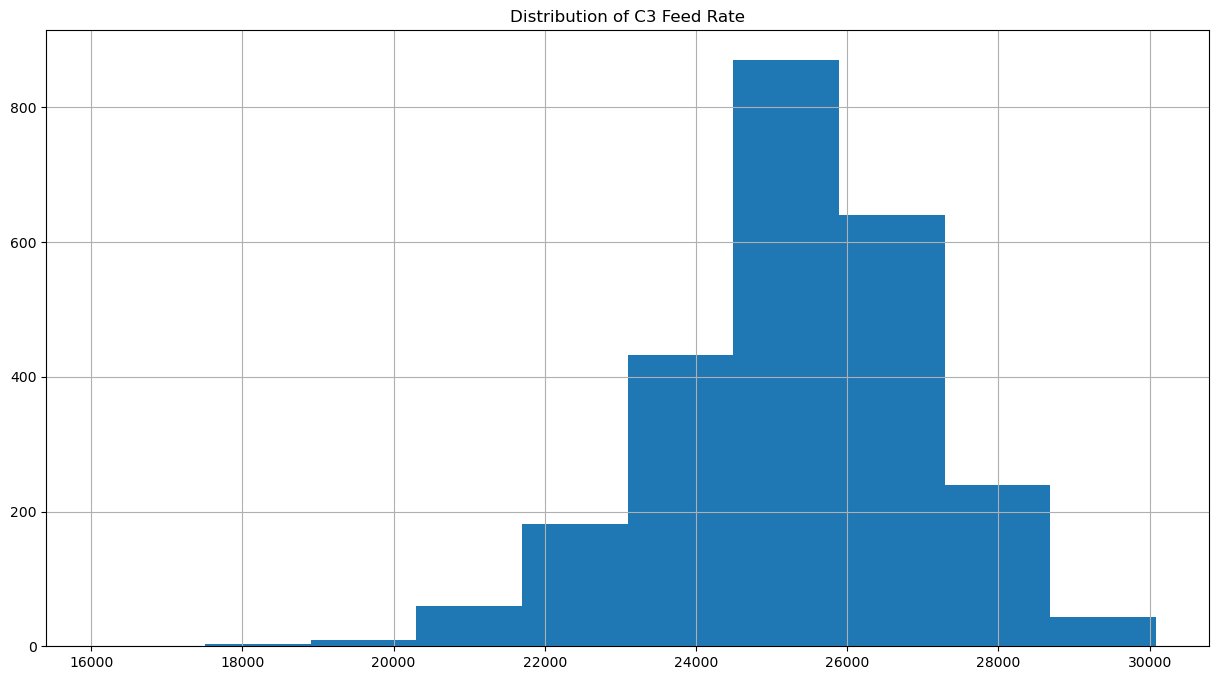

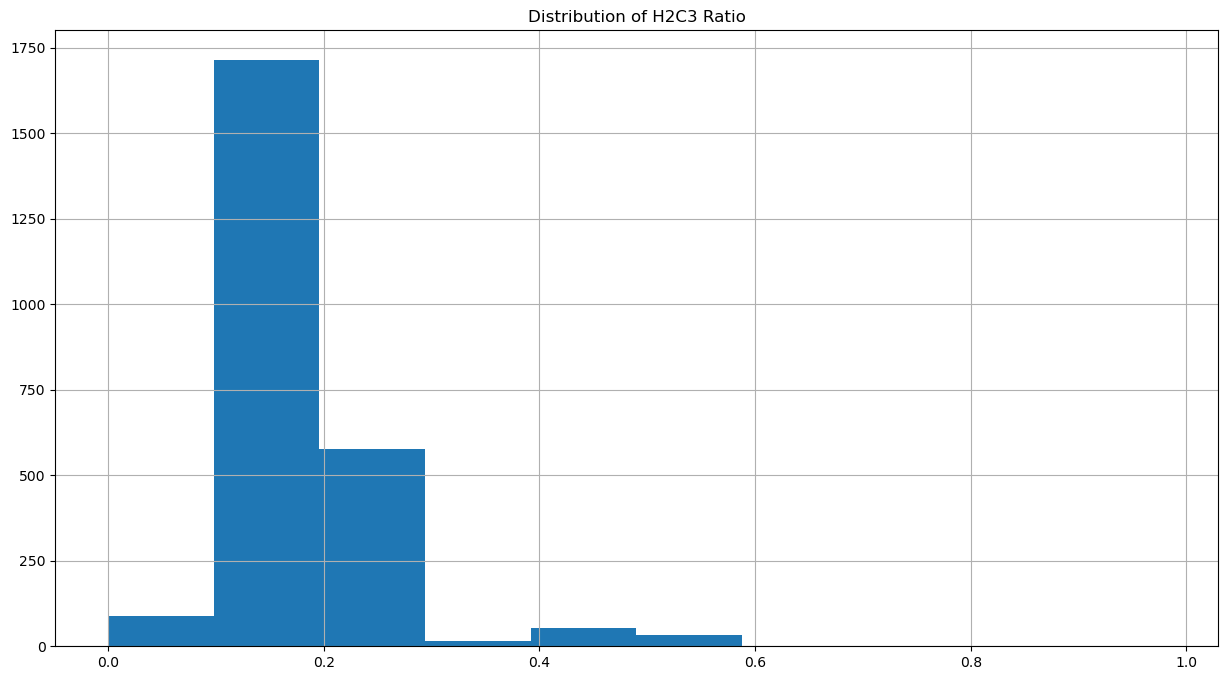

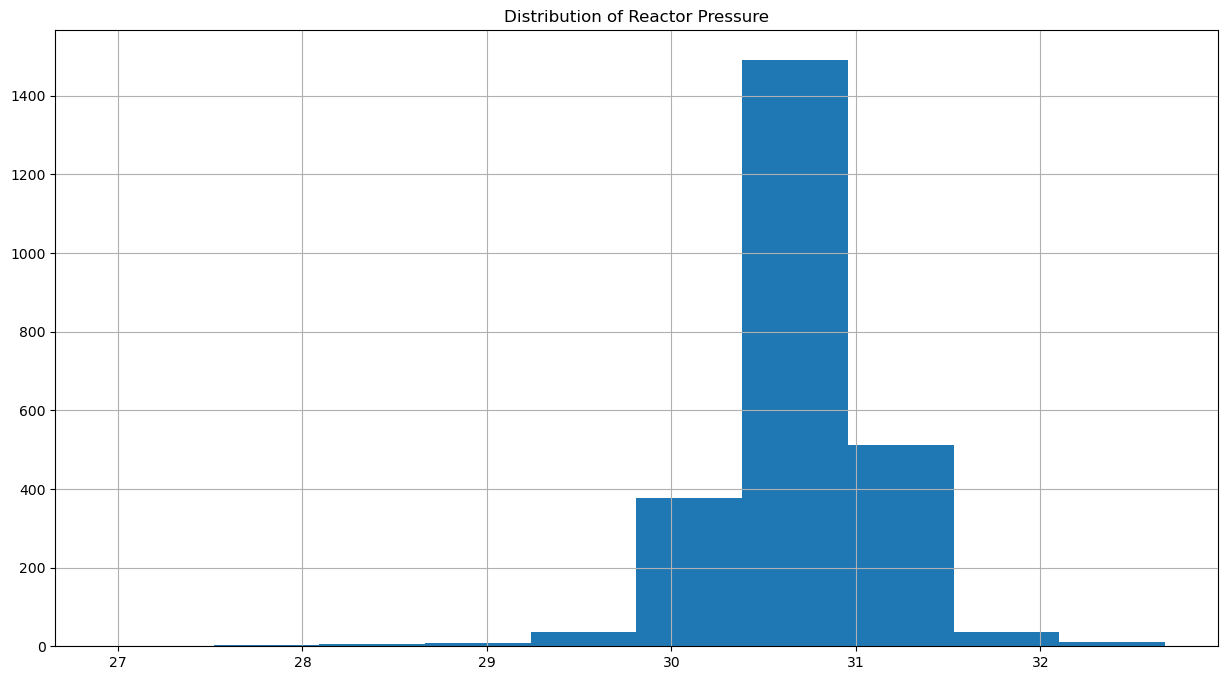

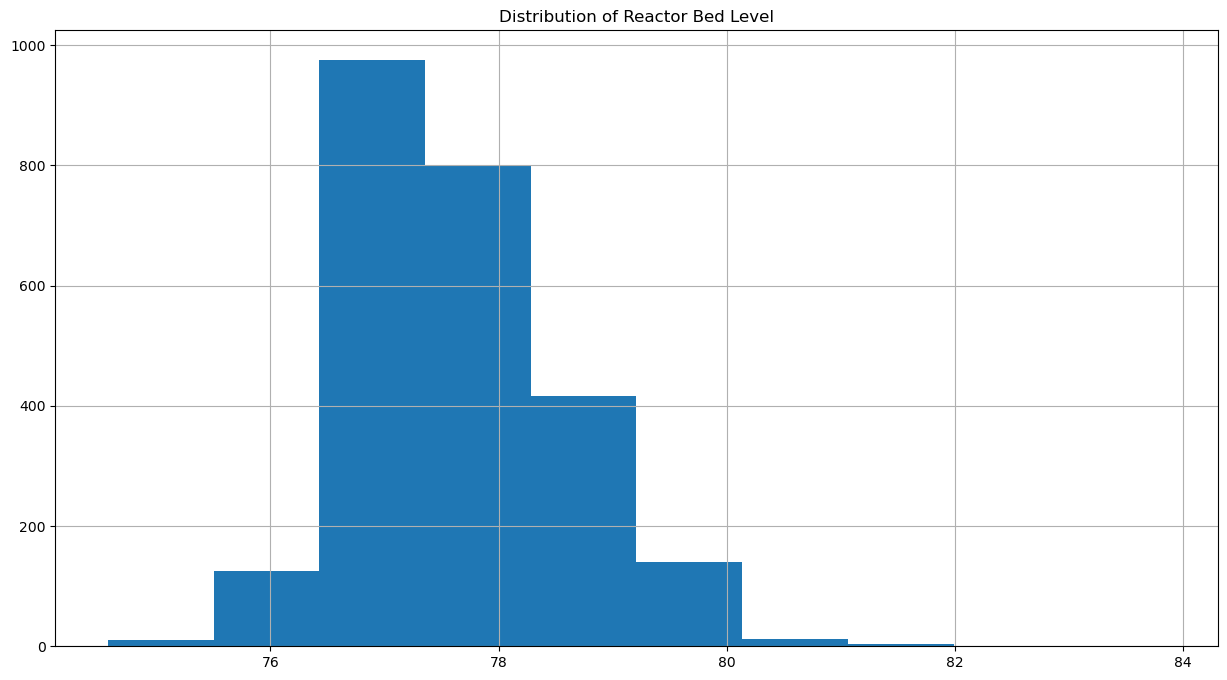

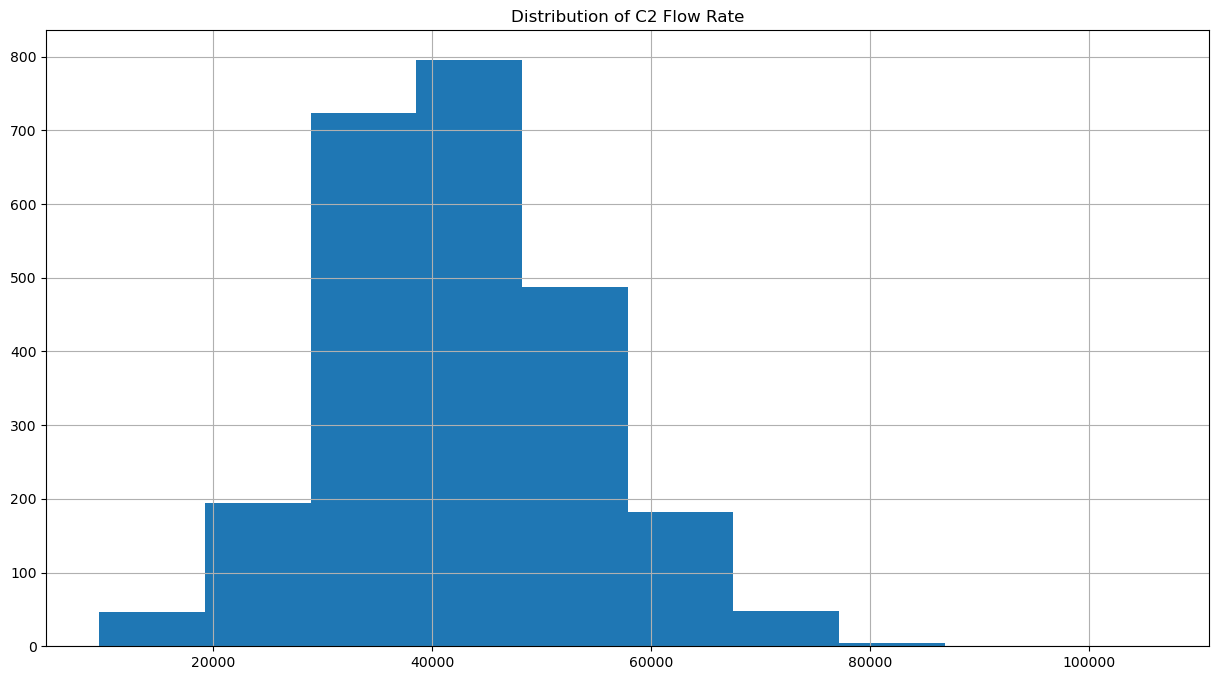

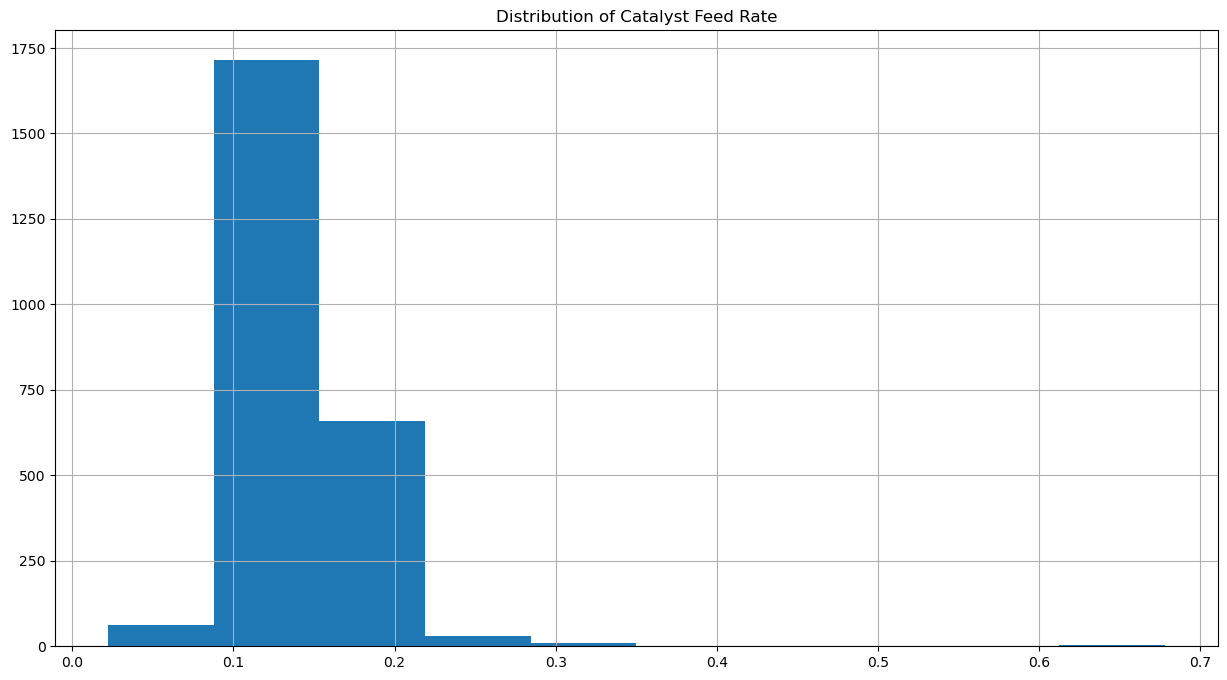

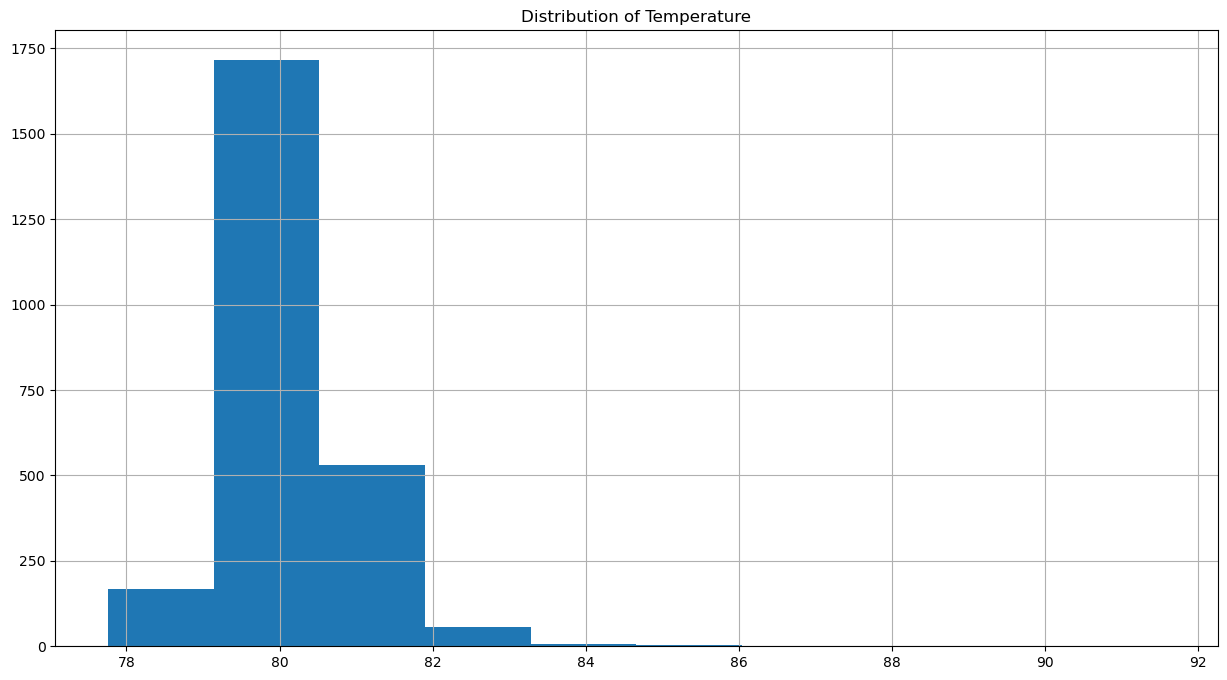

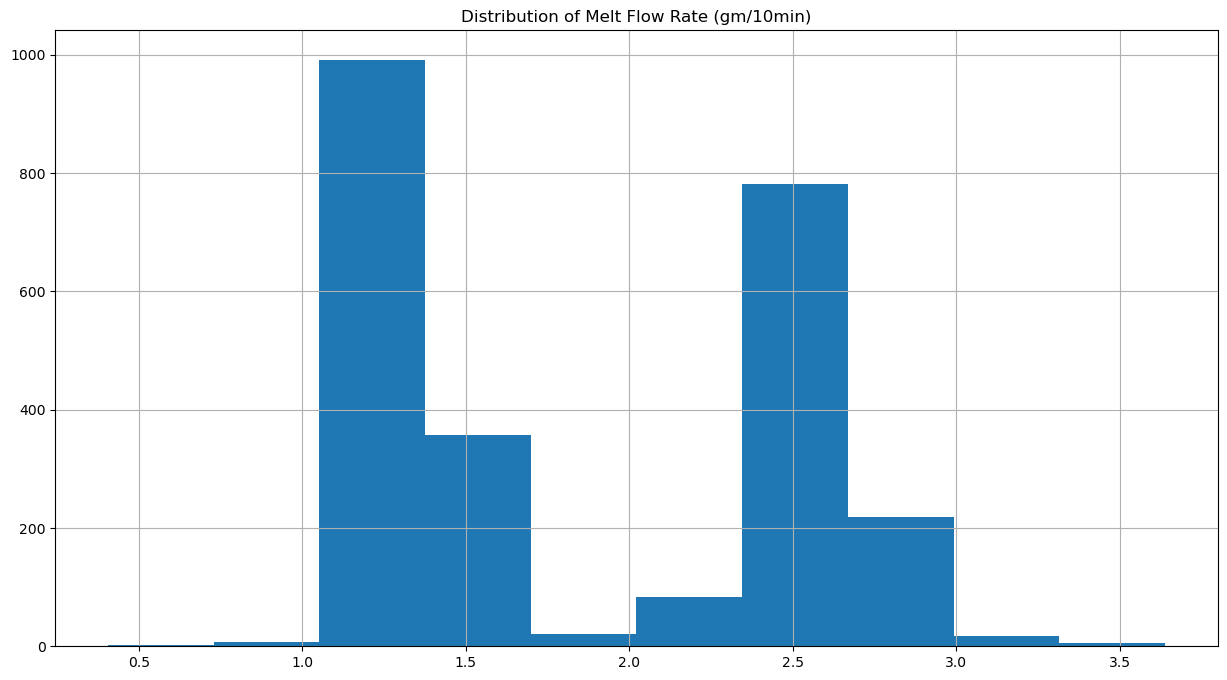

In [24]:
def create_hist(column):
    plt.figure(figsize=(15,8))
    df[column].hist()
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

for col in df.columns:
    create_hist(col)

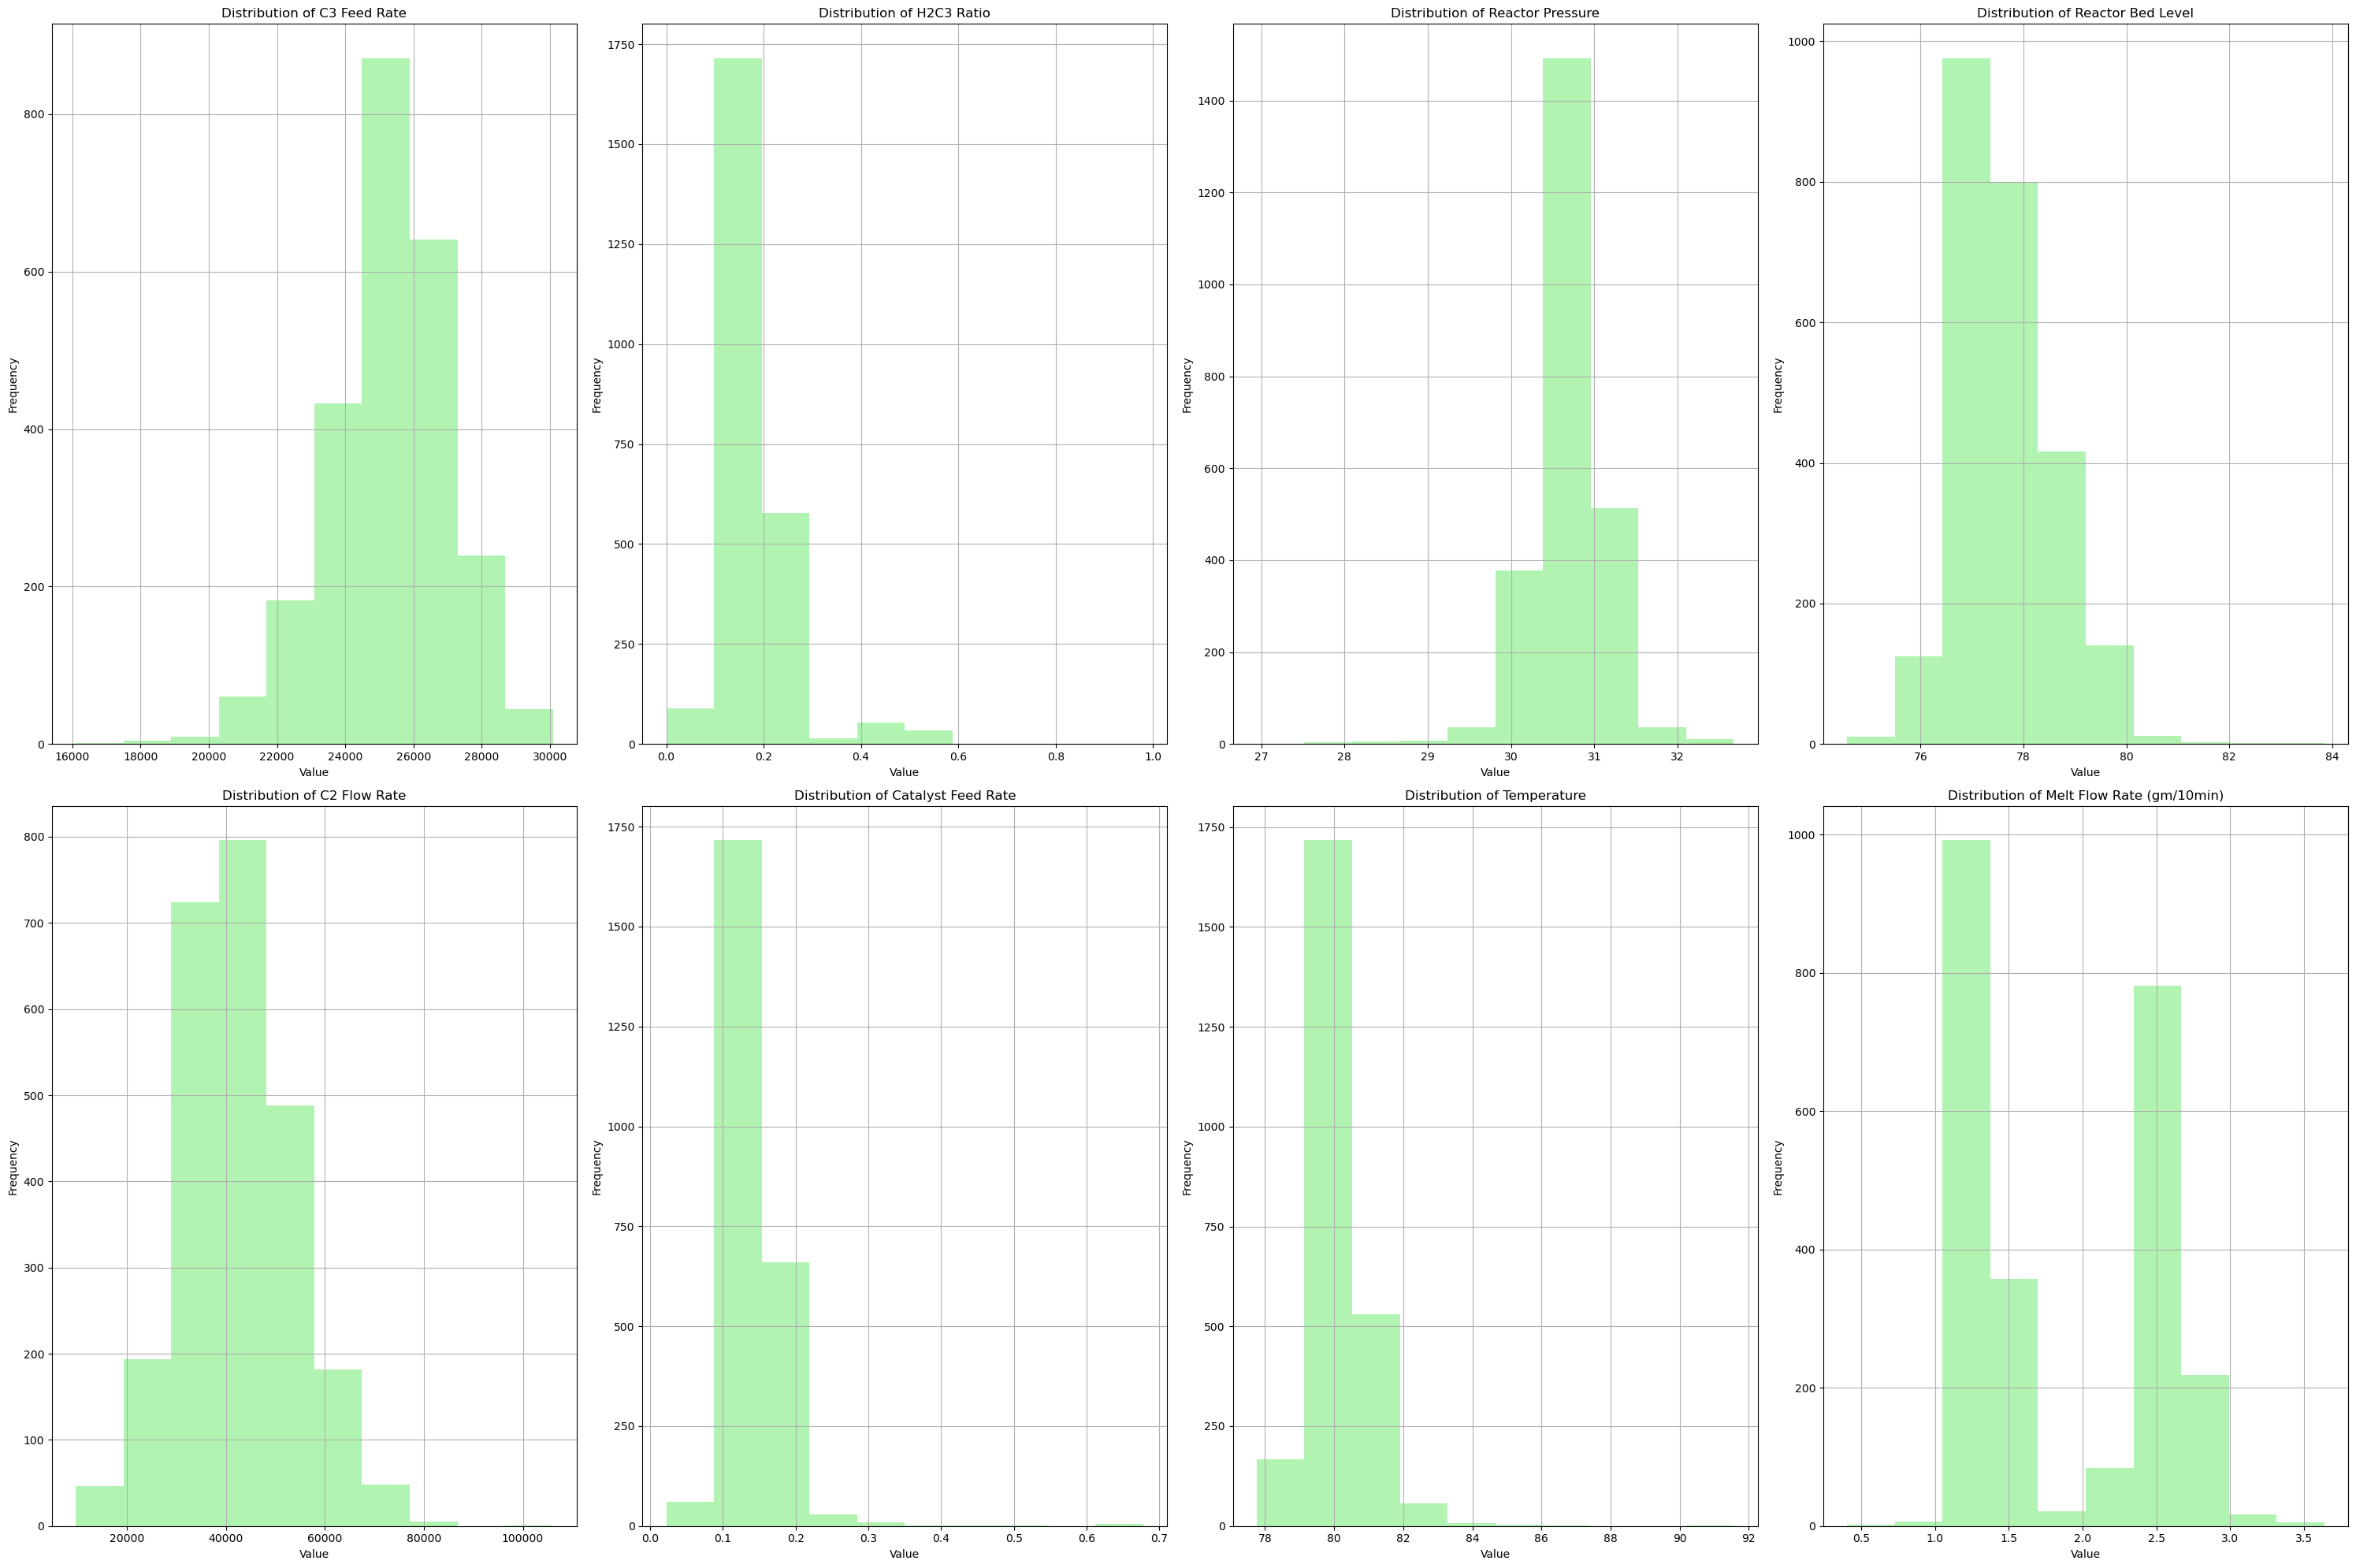

In [25]:
# Create a figure and axis objects
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 20))

# Flatten the axis array
axs = axs.flatten()

for i, column in enumerate(df.columns):
    ax = axs[i]
    ax.hist(df[column],alpha=0.7,color='lightgreen')
    ax.set_title(f'Distribution of {column}')
    ax.grid(True)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Boxplot

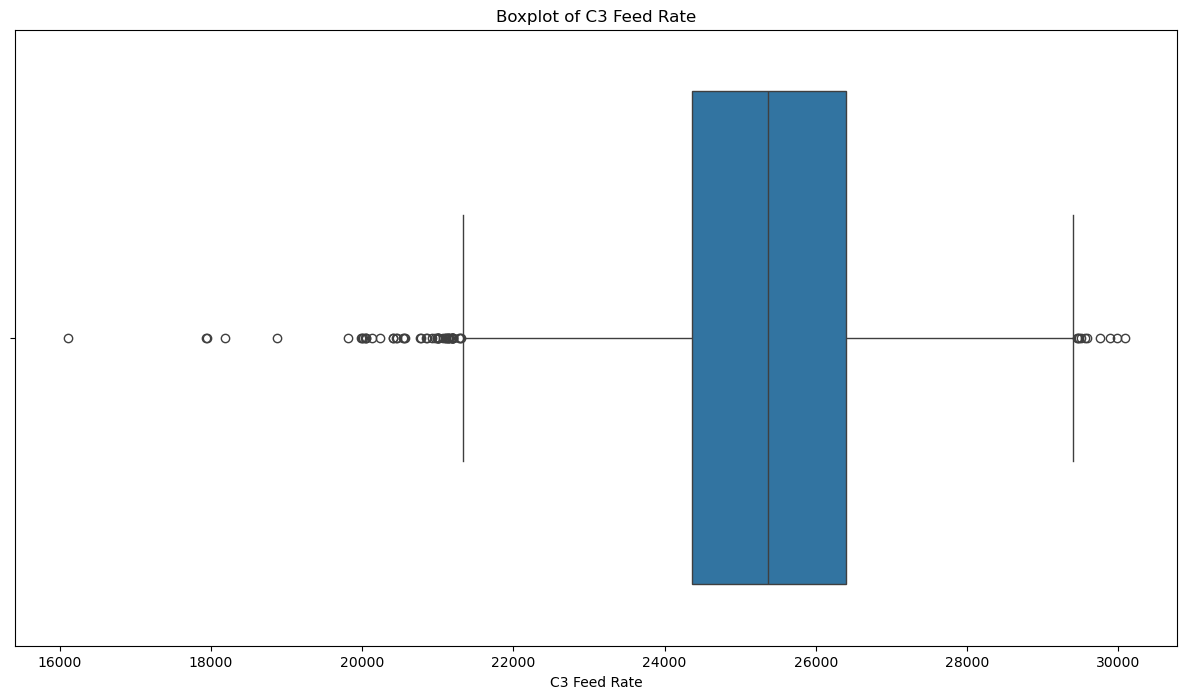

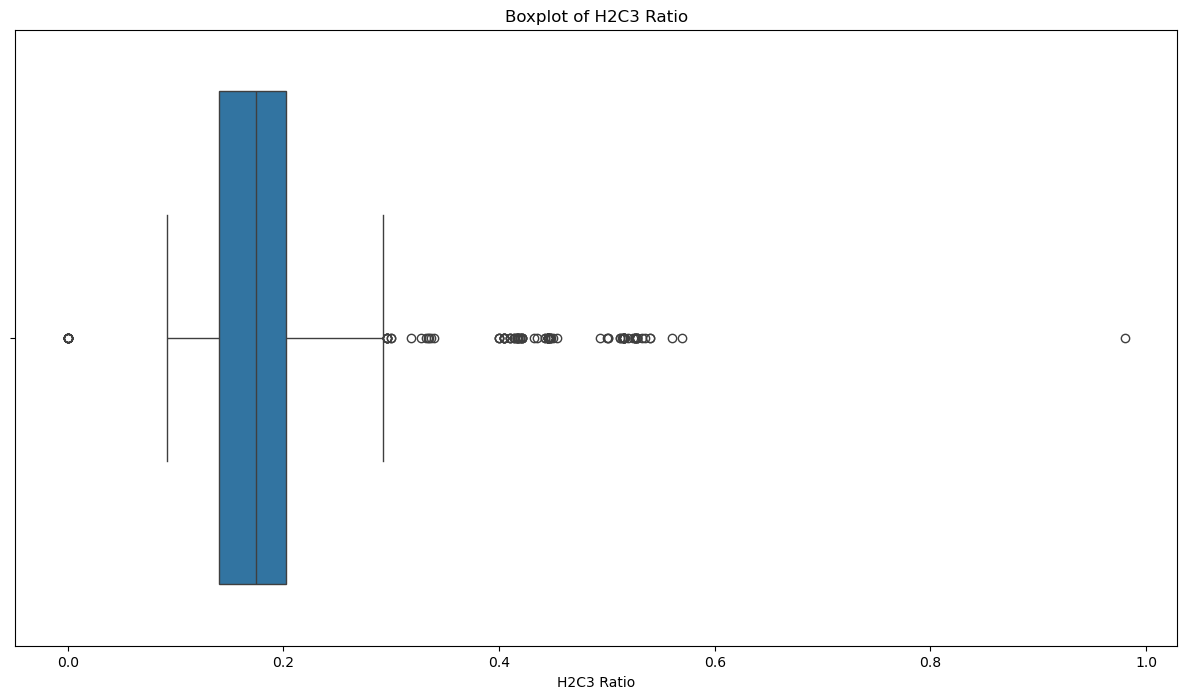

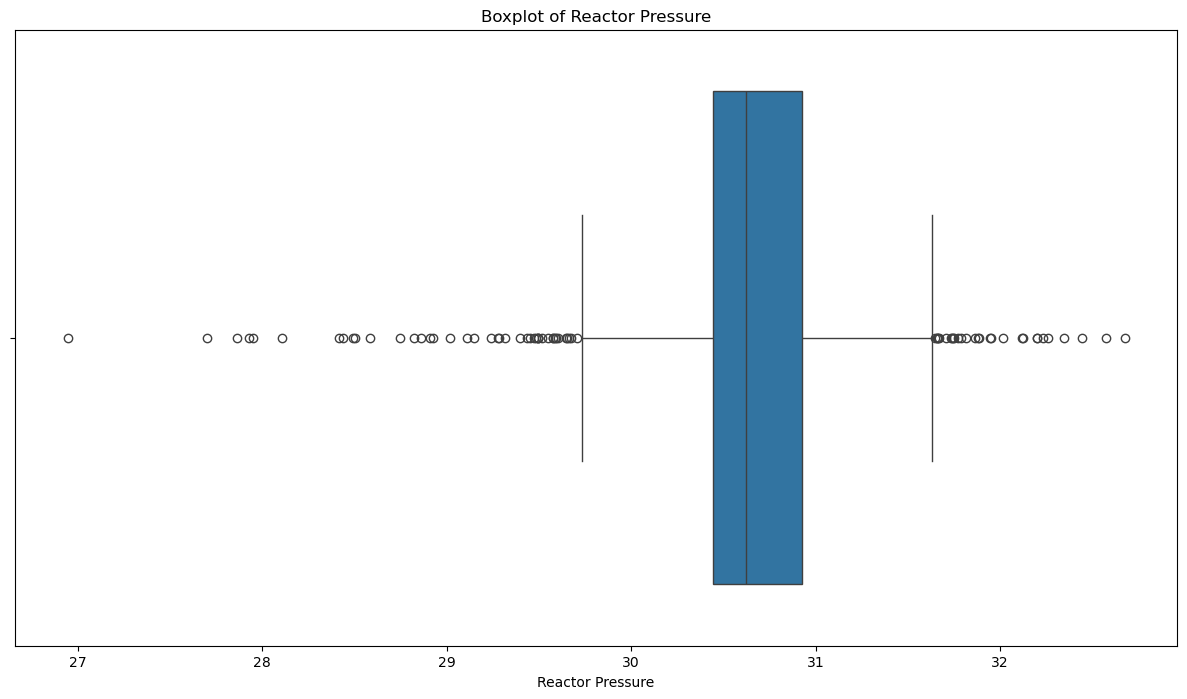

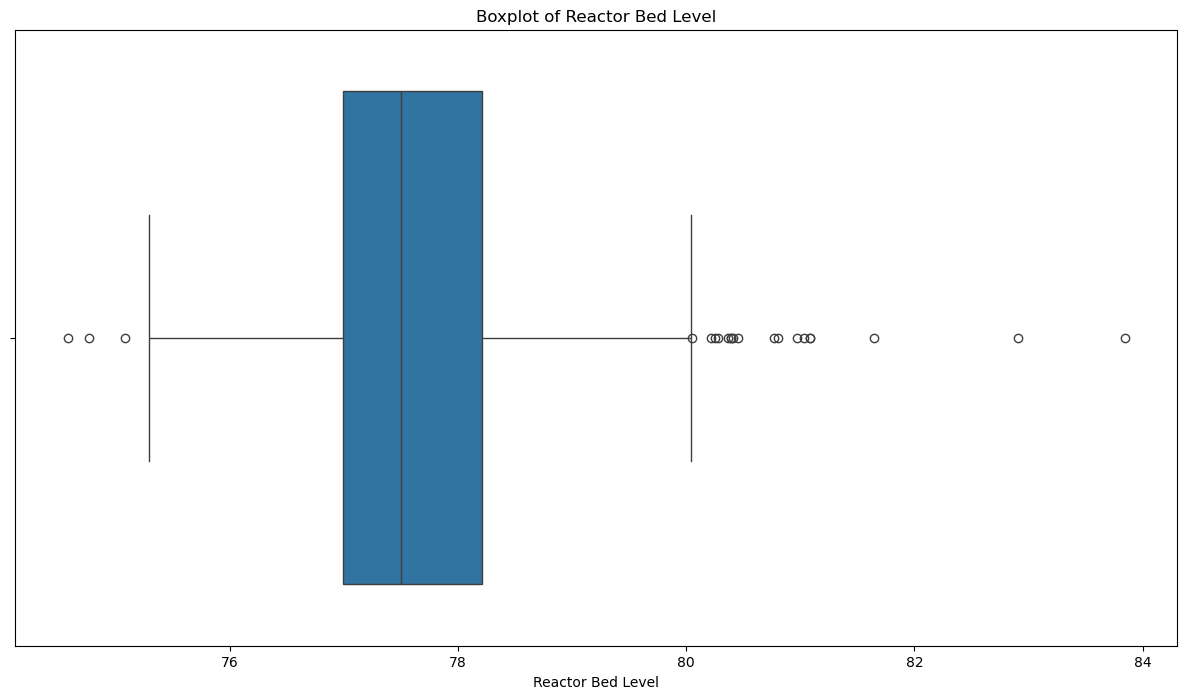

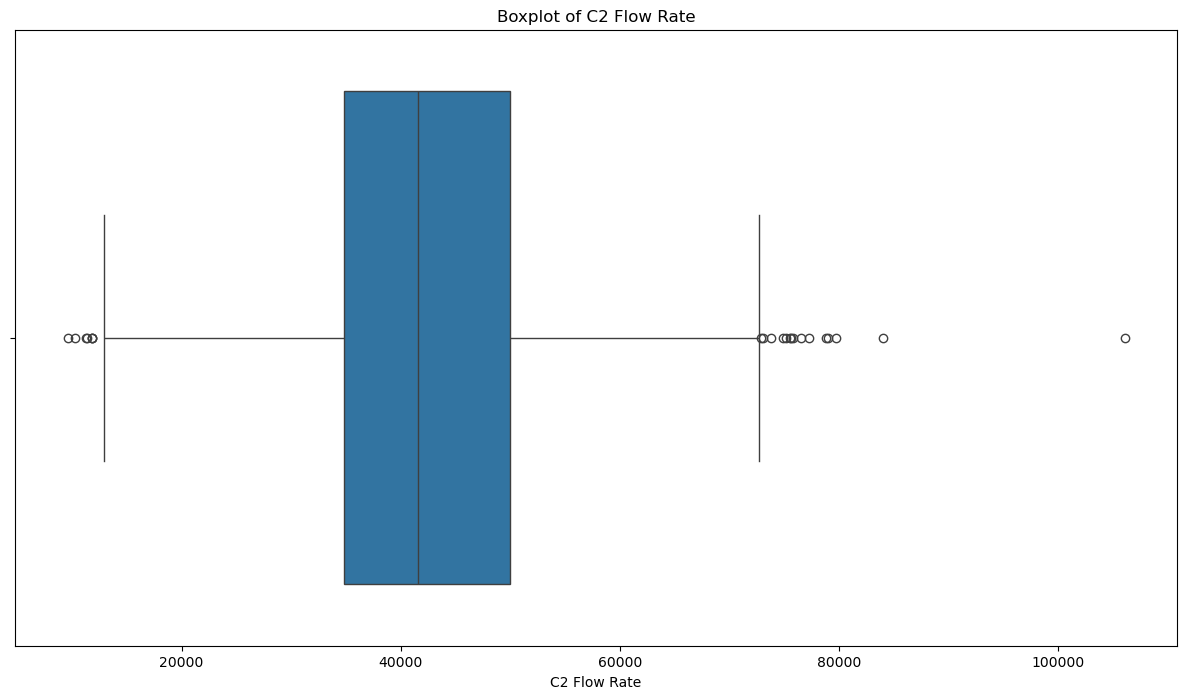

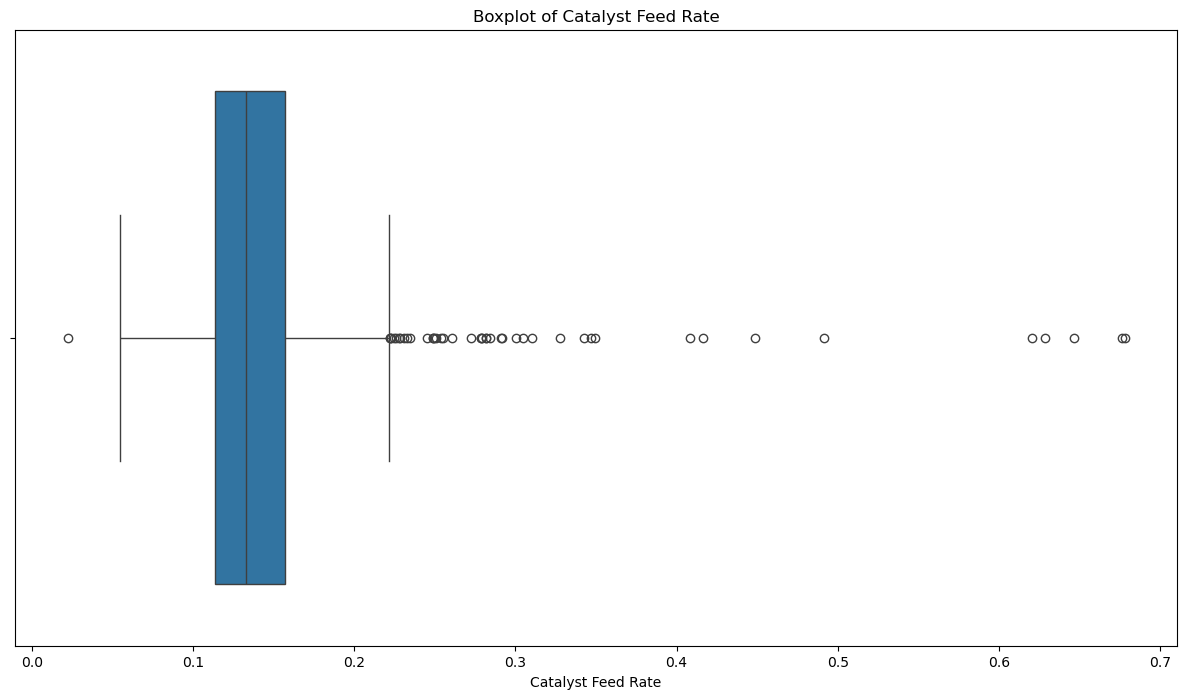

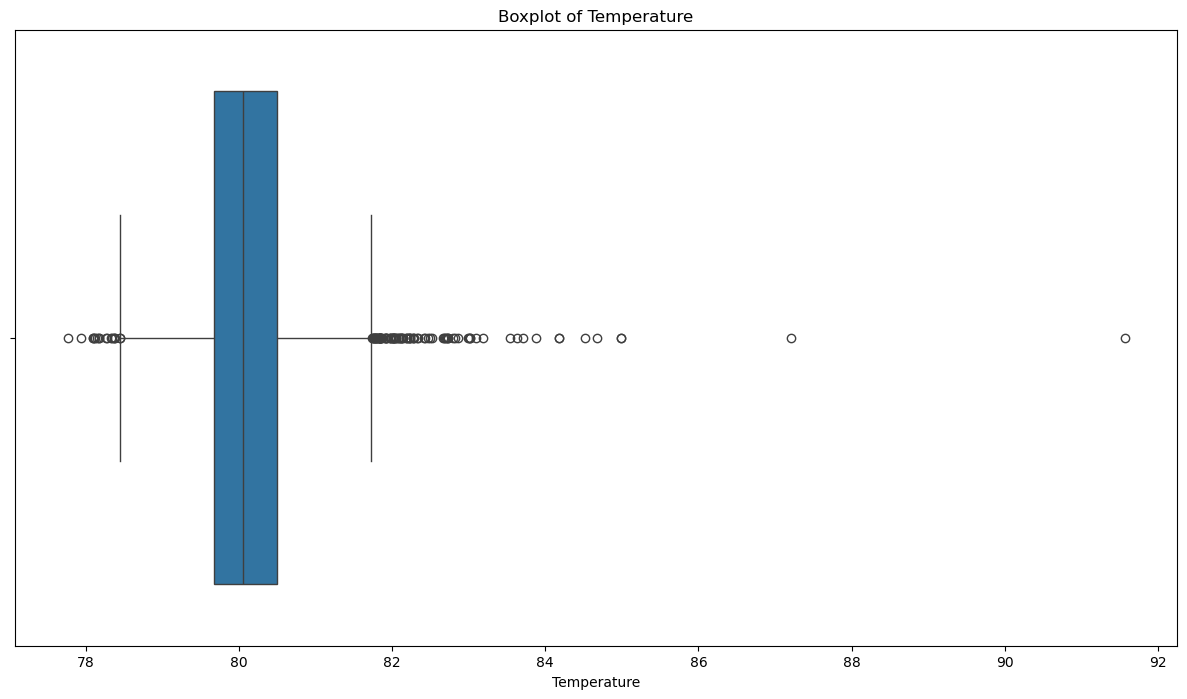

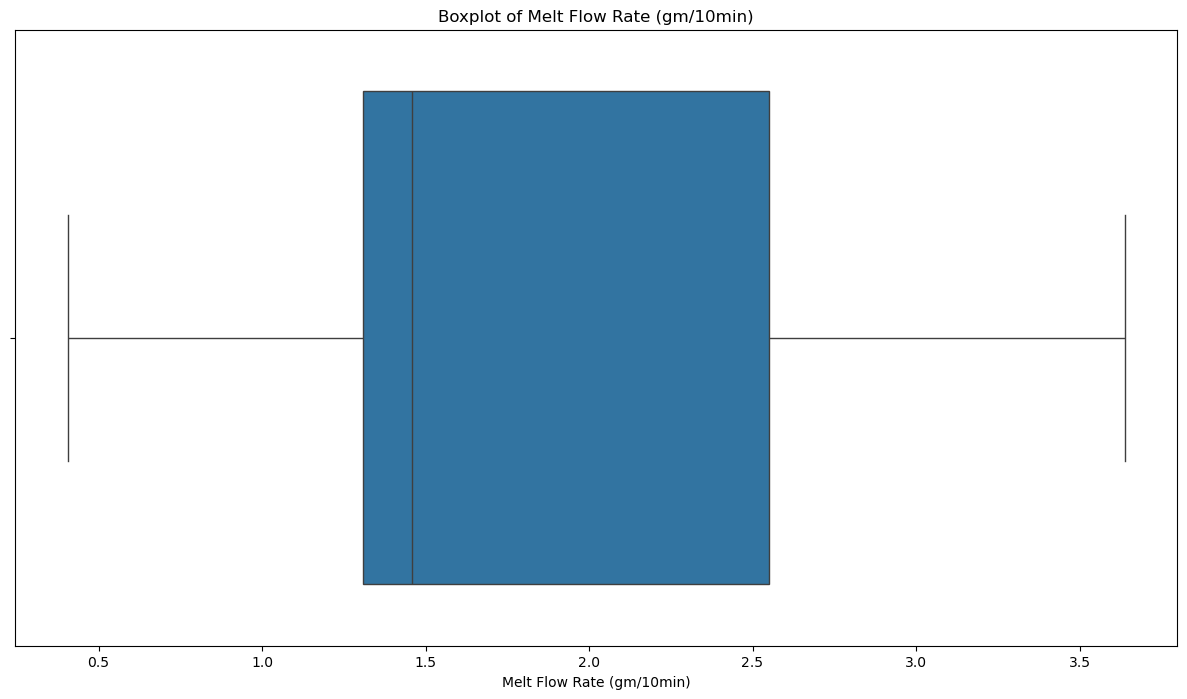

In [26]:
def create_box(column):
    plt.figure(figsize=(15,8))
    sns.boxplot(x = df[column]) 
    plt.title(f'Boxplot of {column}')
    plt.ylabel('')
    plt.show()

for col in df.columns:
    create_box(col)

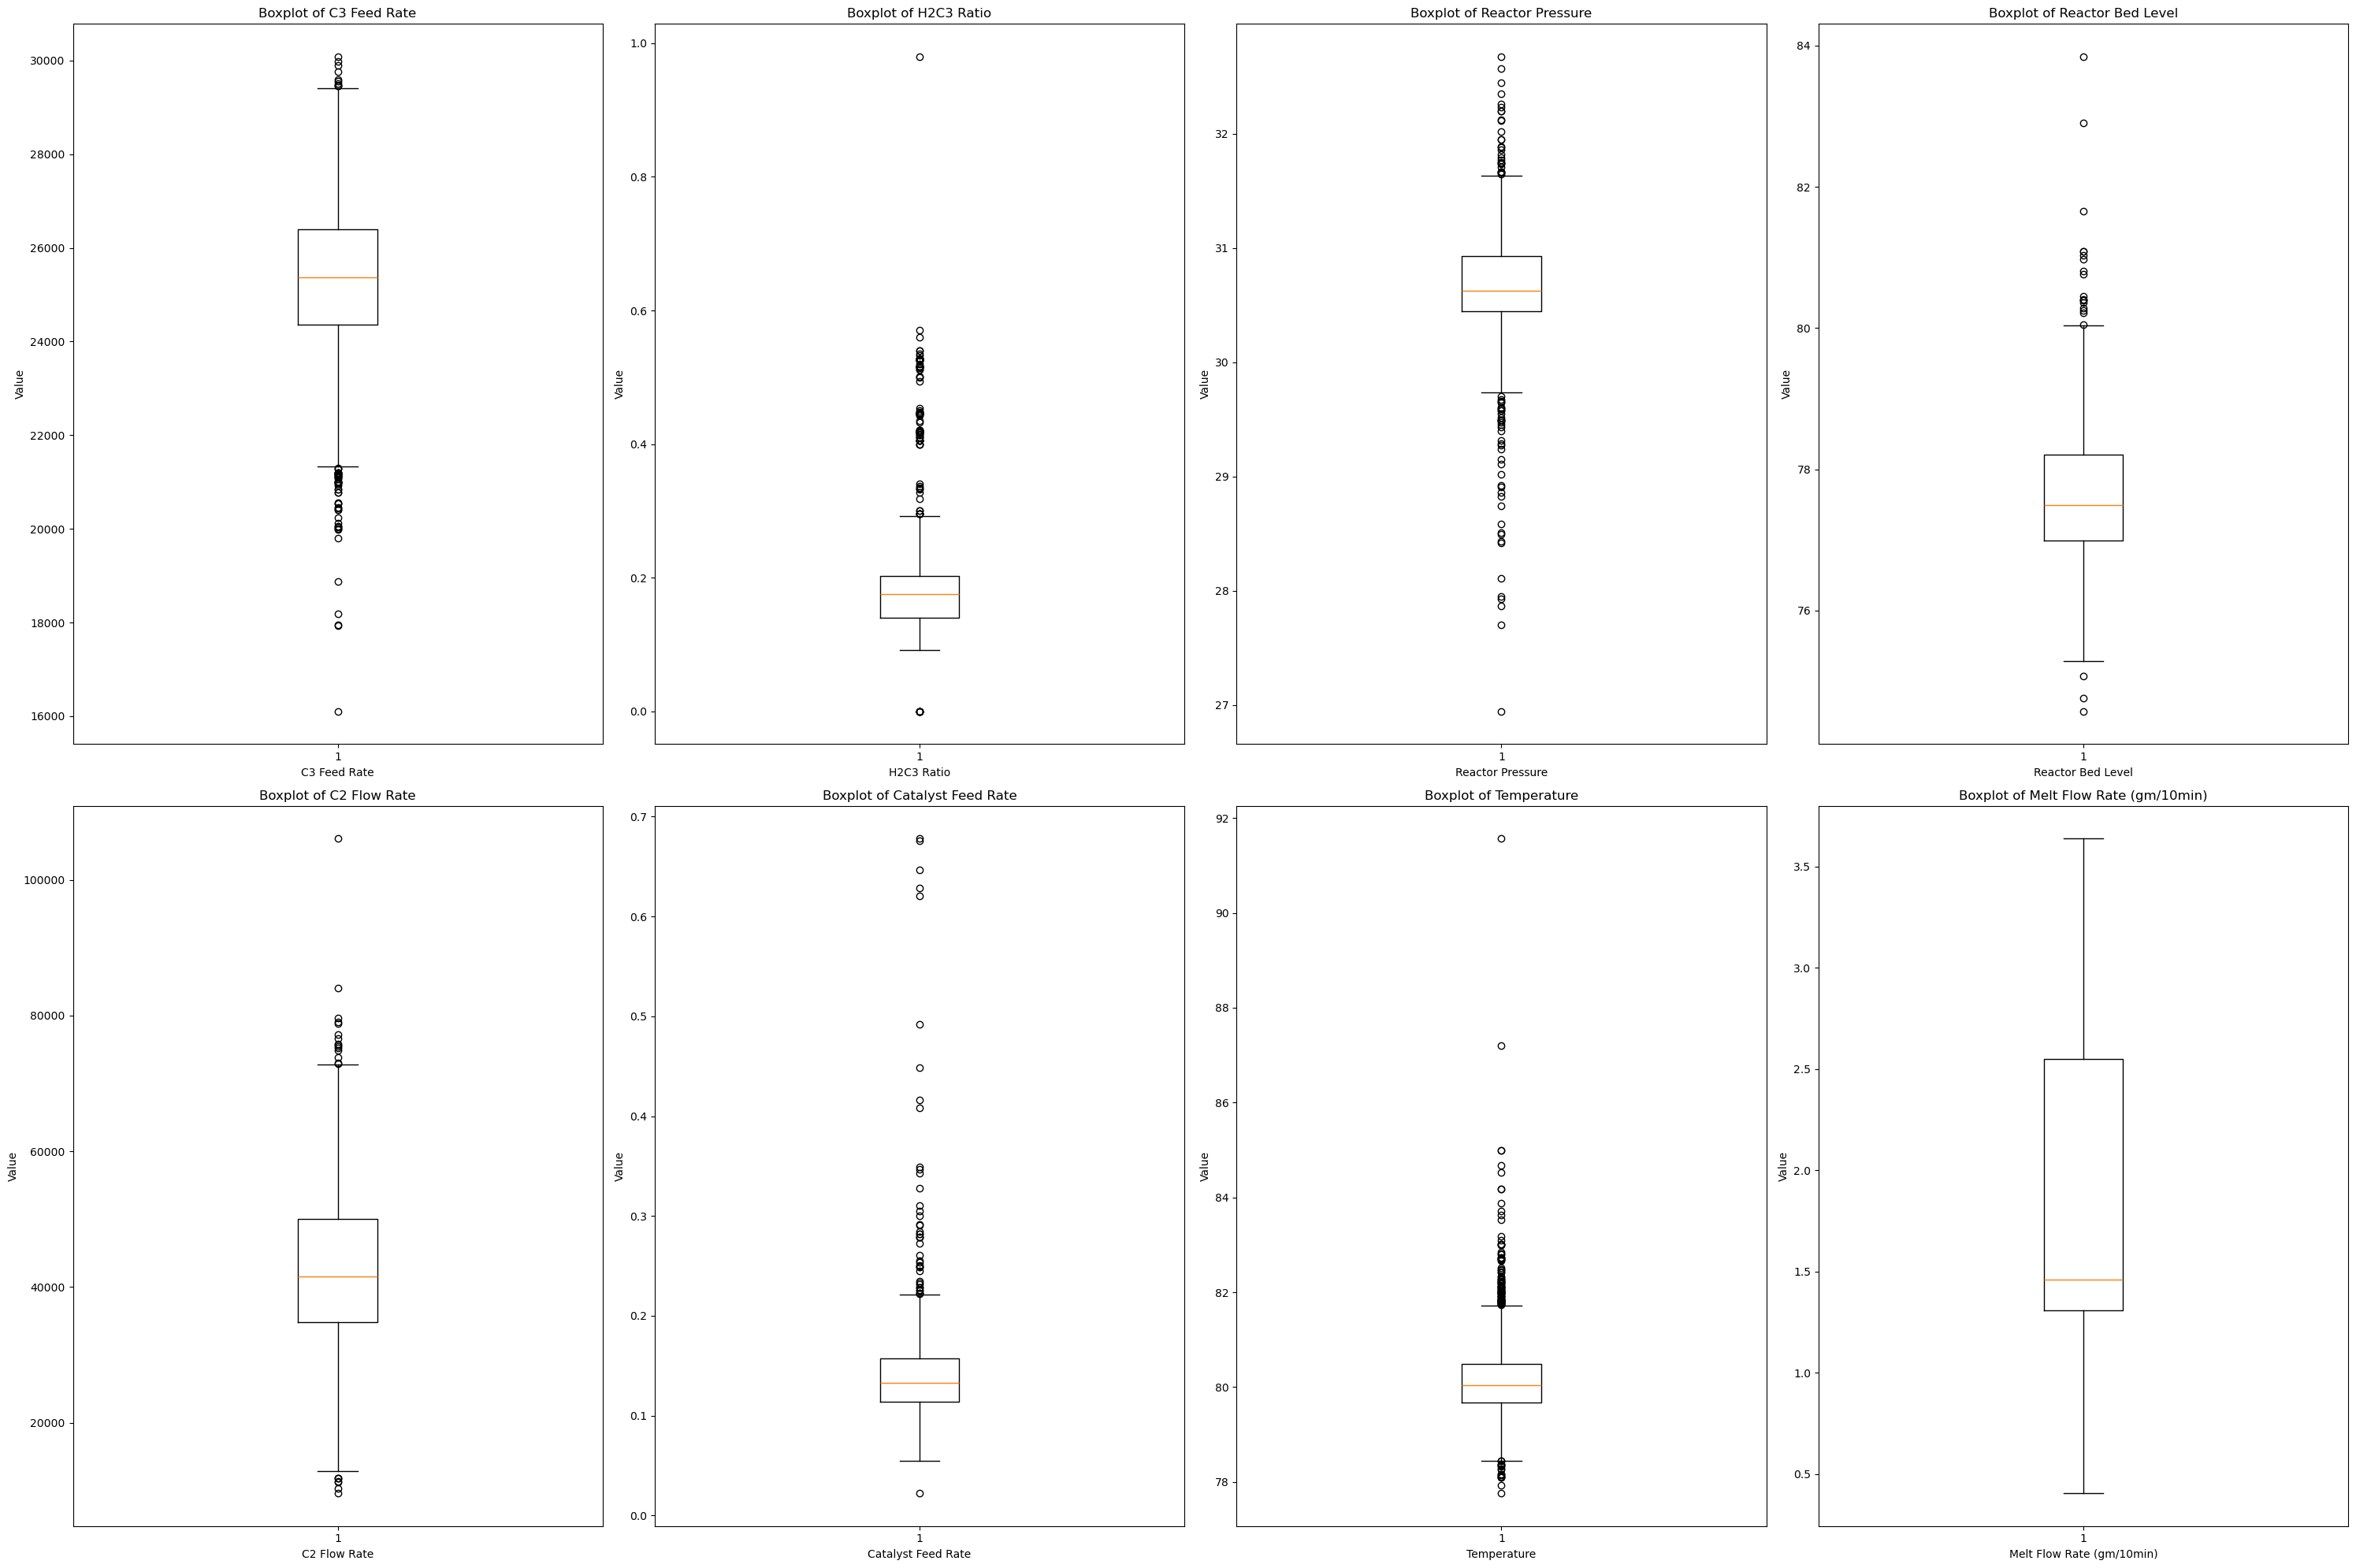

In [27]:
# Create a figure and axis objects
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 20))

# Flatten the axis array
axs = axs.flatten()

for i, column in enumerate(df.columns):
    ax = axs[i]
    ax.boxplot(df[column])
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

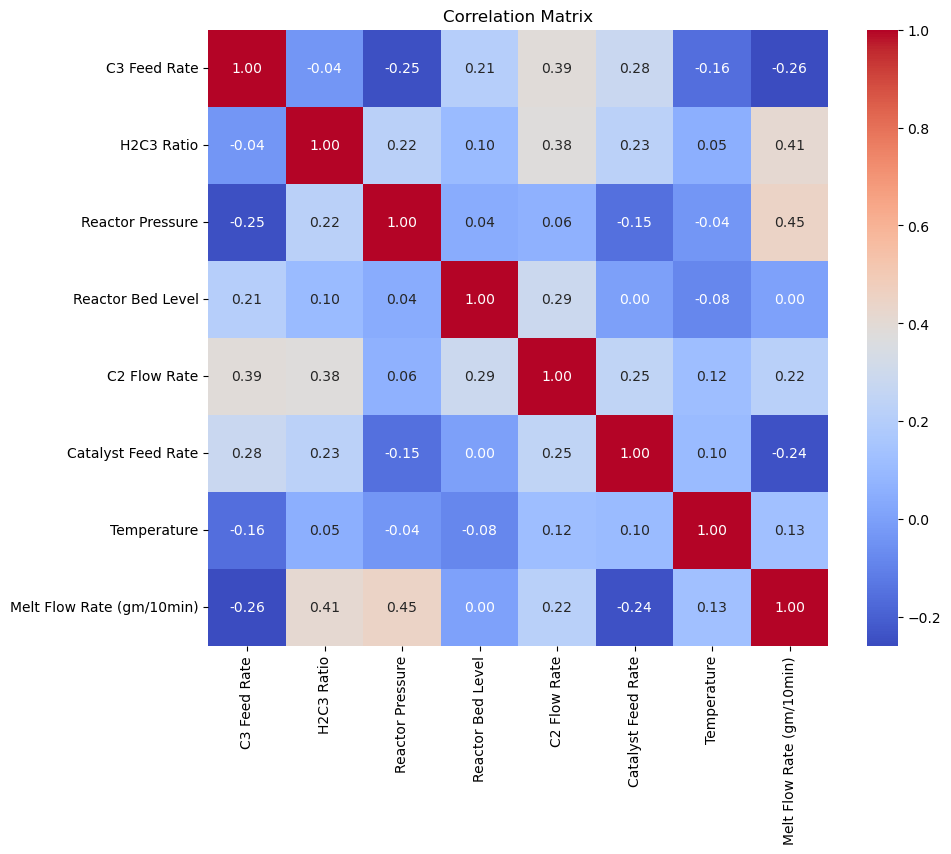

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [29]:
### So, by analyzing the data, it seems that there are considerable outliers in the data and the distribution is also skewed for some columns
### But the main concern is that the values in different features range over different values. So , we need to scale them. 

#### Normalization

In [30]:
### Here while model fitting we are setting 'Melt Flow Rate(gm/10min)' as our 'target variable' .So no nedd to scale it.
features = df.drop(['Melt Flow Rate (gm/10min)'],axis =1)
features.columns

Index(['C3 Feed Rate', 'H2C3 Ratio', 'Reactor Pressure', 'Reactor Bed Level',
       'C2 Flow Rate', 'Catalyst Feed Rate', 'Temperature'],
      dtype='object')

In [31]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()


# Fit and transform the data
normalized_features = scaler.fit_transform(features)
# Convert the normalized array back to a DataFrame
normalized_features = pd.DataFrame(normalized_features, columns=features.columns)

normalized_features.head(10)

,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature
0,0.626039,0.156122,0.605534,0.548468,0.427522,0.216268,0.191178
1,0.674735,0.156122,0.625137,0.427020,0.338153,0.164036,0.079761
2,0.685611,0.156122,0.595294,0.460480,0.370353,0.194934,0.076631
3,0.643364,0.156122,0.689241,0.496188,0.346936,0.197283,0.091450
4,0.625850,0.153061,0.651940,0.442636,0.319230,0.153123,0.092592
5,0.662255,0.153061,0.609742,0.401205,0.237791,0.180520,0.094256
6,0.682297,0.153061,0.606323,0.430902,0.341555,0.220660,0.130759
7,0.780051,0.153061,0.621185,0.461491,0.375978,0.210956,0.118081
8,0.801381,0.153061,0.568805,0.470063,0.413820,0.208673,0.054441
9,0.752457,0.153061,0.568290,0.431514,0.348281,0.182163,0.050776


In [32]:
import pickle
## Creating a pickle file for scaling
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Text(0, 0.5, 'Scaled Value')

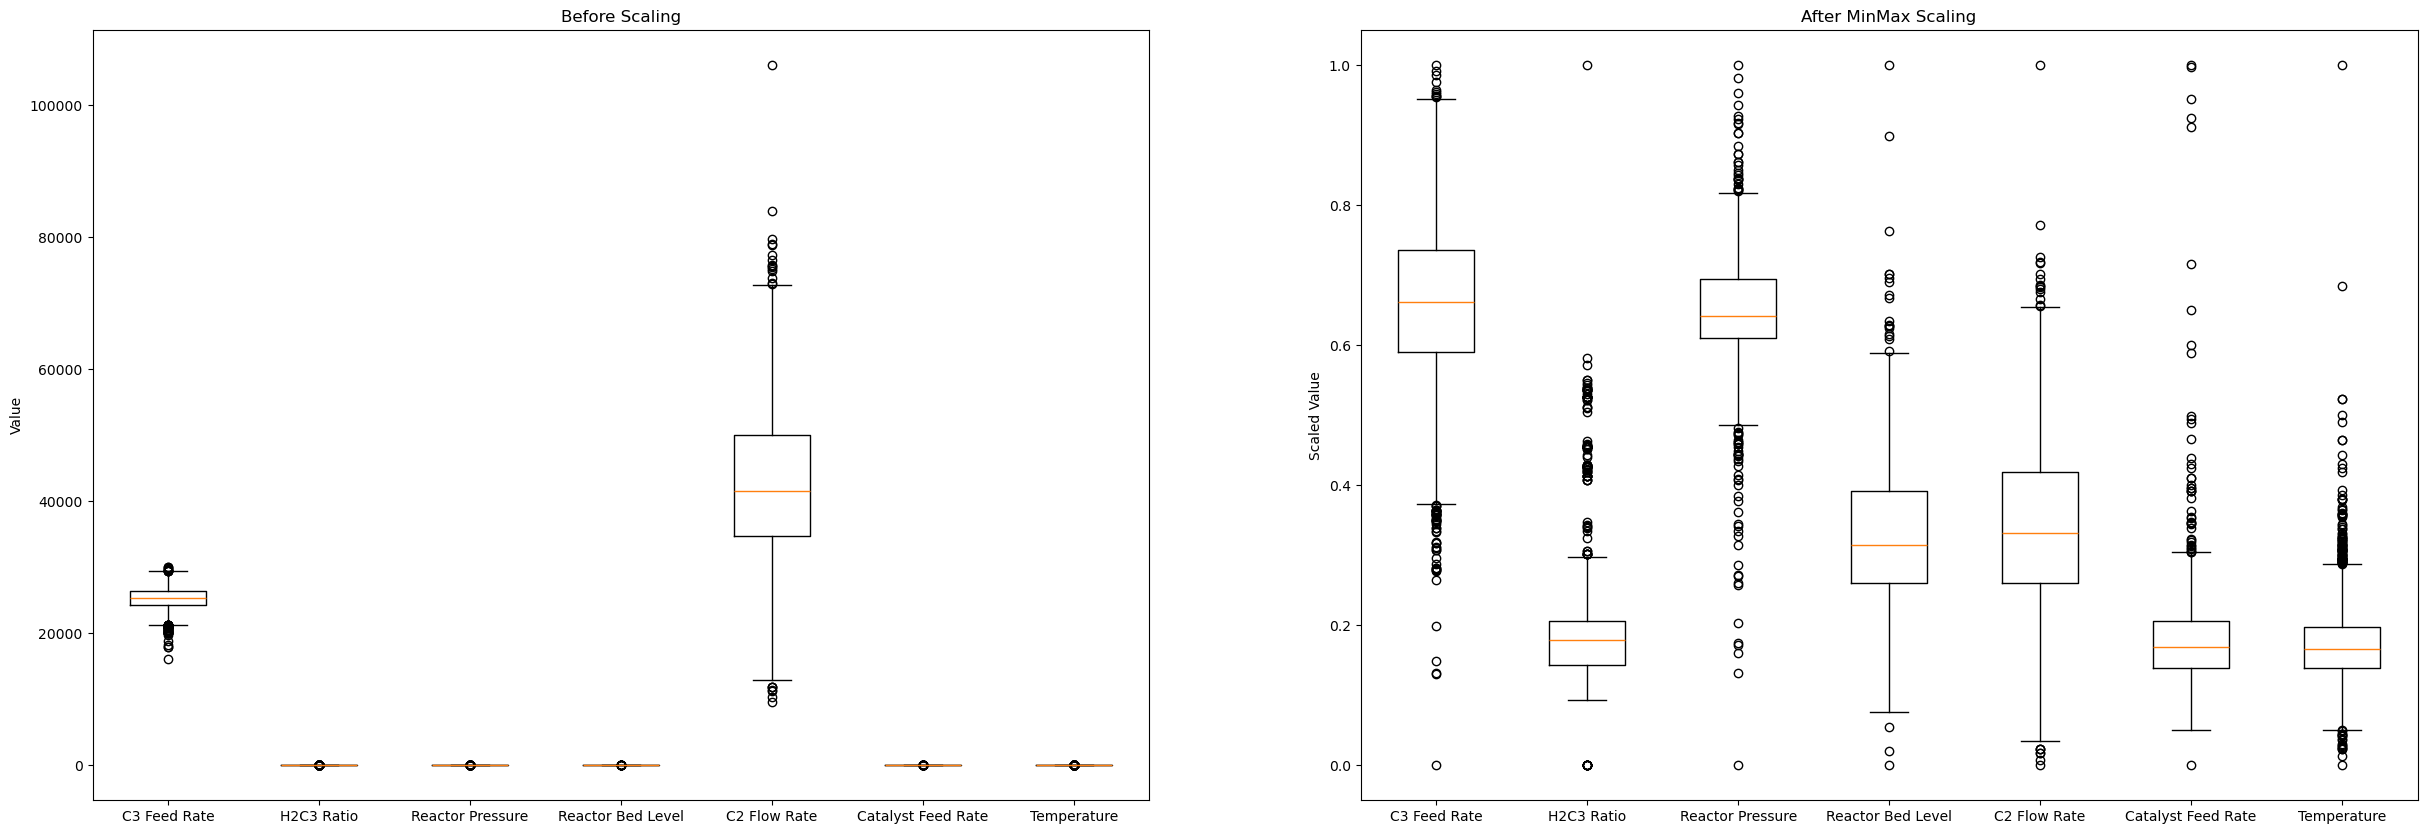

In [33]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.boxplot(x=features)
plt.title('Before Scaling')
plt.xticks(range(1, len(features.columns) + 1), features.columns)
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.boxplot(normalized_features.values)
plt.title('After MinMax Scaling')
plt.xticks(range(1, len(normalized_features.columns) + 1), normalized_features.columns)
plt.ylabel('Scaled Value')

In [34]:
data = pd.concat([normalized_features,df['Melt Flow Rate (gm/10min)']],axis=1)

In [35]:
data.to_csv('Preprocessed.csv')